# Python

# Total Marks: 100 
Each question 10 marks

Question 1: - 
Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word. 
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same. 
Example input - string = “write write write all the number from from from 1 to 100” 
Example output - 5 
Explanation - From the given string we can note that the most frequent words are “write” and “from” and the maximum value of both the values is “write” and its corresponding length is 5 

In [1]:
def find_highest_frequency_word_length(string):
    words = string.split()
    word_counts = {}

    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    highest_frequency = max(word_counts.values())
    highest_frequency_word = [word for word, count in word_counts.items() if count == highest_frequency]
    return len(highest_frequency_word[0])

# Test case 1
string1 = "write write write all the number from from from 1 to 100"
print(find_highest_frequency_word_length(string1))

# Test case 2
string2 = "apple apple banana banana banana cherry cherry cherry cherry cherry cherry"
print(find_highest_frequency_word_length(string2))

# Test case 3
string3 = "hello world hello world hello world"
print(find_highest_frequency_word_length(string3))

5
6
5


Question 2: - 
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO . 
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same. 
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 } Example output 1- YES 
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 2 } 
Example output 2 - NO 

In [5]:
def is_valid_string(s):
    char_counts = {}
    for char in s:
        if char in char_counts:
            char_counts[char] += 1
        else:
            char_counts[char] = 1

    counts = list(char_counts.values())
    unique_counts = set(counts)

    if len(unique_counts) == 1:
        return "YES"

    if len(unique_counts) == 2:
        count1, count2 = unique_counts
        if (counts.count(count1) == 1 and count1 == 1) or (counts.count(count2) == 1 and count2 == 1):
            return "YES"

    return "NO"

# Test case 1
s1 = "abc"
print(is_valid_string(s1))  

# Test case 2
s2 = "abcc"
print(is_valid_string(s2)) 

# Test case 3
s3 = "xyyzz"
print(is_valid_string(s3))

# Test case 4
s4 = "aabbccc"
print(is_valid_string(s4))

# Test case 5
s5 = "abcd"
print(is_valid_string(s5))

YES
NO
YES
NO
YES


Question 3: - 
Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format. 
Note - Write comments wherever necessary explaining the code written.
Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json 
Data Attributes - id: Identification Number - int num: Number of the 
● Pokémon in the official Pokédex - int name: Pokémon name - 
● string img: URL to an image of this Pokémon - string type: 
● Pokémon type -string height: Pokémon height - float 
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or given 
● when transferred - string candy_count: the amount of candies required to evolve - int 
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance: 
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this 
pokemon on 10.000 spawns (NEW) - int 
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int weakness: Types of 
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous evolutions of Pokémon - - list of dict 

In [36]:
import requests
import pandas as pd

def download_pokedex_data(url):
    response = requests.get(url)
    data = response.json()
    return data

def convert_to_dataframe(data):
    records = []
    for pokemon in data["pokemon"]:
        record = {
            "ID": pokemon["id"],
            "Number": pokemon["num"],
            "Name": pokemon["name"],
            "Image URL": pokemon["img"],
            "Type": ", ".join(pokemon["type"]),
            "Height": pokemon["height"],
            "Weight": pokemon["weight"],
            "Candy": pokemon.get("candy", ""),
            "Candy Count": pokemon.get("candy_count", ""),
            "Egg": pokemon.get("egg", ""),
            "Spawn Chance": pokemon.get("spawn_chance", ""),
            "Average Spawns": pokemon.get("avg_spawns", ""),
            "Spawn Time": pokemon.get("spawn_time", ""),
            "Weaknesses": ", ".join(pokemon.get("weaknesses", [])),
            "Next Evolution": ", ".join([evo["name"] for evo in pokemon.get("next_evolution", [])]),
            "Previous Evolution": ", ".join([evo["name"] for evo in pokemon.get("prev_evolution", [])])
        }
        records.append(record)

    
    df = pd.DataFrame(records)
    return df

def export_to_excel(dataframe, output_file):
    dataframe.to_excel(output_file, index=False)


url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
pokedex_data = download_pokedex_data(url)


df_pokedex = convert_to_dataframe(pokedex_data)


output_file = "pokedex.xlsx"
export_to_excel(df_pokedex, output_file)
df_pokedex.to_excel('saved_file.xlsx')
print(df_pokedex)

      ID Number        Name                                         Image URL  \
0      1    001   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2    002     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3    003    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4    004  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5    005  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...    ...         ...                                               ...   
146  147    147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148    148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149    149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150    150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151    151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

               Type  Height

Question 4 - 
Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file. 
Link - https://data.nasa.gov/resource/y77d-th95.json 
Note - Write code comments wherever needed for code understanding.

In [38]:
import requests
import pandas as pd

def download_meteorite_data(url):
    response = requests.get(url) 
    data = response.json()  
    return data

def convert_to_dataframe(data):
    records = []
    for meteorite in data:
        record = {
            "Name of Earth Meteorite": meteorite.get("name", ""),
            "ID of Earth Meteorite": meteorite.get("id", ""),
            "Name Type": meteorite.get("nametype", ""),
            "Recclass": meteorite.get("recclass", ""),
            "Mass (g)": meteorite.get("mass (g)", ""),
            "Year": meteorite.get("year", ""),
            "Latitude": meteorite.get("reclat", ""),
            "Longitude": meteorite.get("reclong", ""),
            "Coordinates": meteorite.get("geolocation", {}).get("coordinates", [])
        }
        records.append(record)

    df = pd.DataFrame(records)
    return df

def export_to_csv(dataframe, output_file):
    dataframe.to_csv(output_file, index=False)

url = "https://data.nasa.gov/resource/y77d-th95.json"
meteorite_data = download_meteorite_data(url)

df_meteorite = convert_to_dataframe(meteorite_data)

output_file = "meteorite_data.csv"
export_to_csv(df_meteorite, output_file)
print(df_meteorite)

    Name of Earth Meteorite ID of Earth Meteorite Name Type  \
0                    Aachen                     1     Valid   
1                    Aarhus                     2     Valid   
2                      Abee                     6     Valid   
3                  Acapulco                    10     Valid   
4                   Achiras                   370     Valid   
..                      ...                   ...       ...   
995                Tirupati                 24009     Valid   
996                 Tissint                 54823     Valid   
997                   Tjabe                 24011     Valid   
998                Tjerebon                 24012     Valid   
999               Tomakovka                 24019     Valid   

                  Recclass Mass (g)                     Year    Latitude  \
0                       L5           1880-01-01T00:00:00.000   50.775000   
1                       H6           1951-01-01T00:00:00.000   56.183330   
2              

Question 5 - 
Write a program to download the data from the given API link and then extract the following data with proper formatting 
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes 
Note - Write proper code comments wherever needed for the code understanding
Sample Data - 

Excepted Output Data Attributes - 
● id - int url - string 
● name - string season 
● - int number - int 
● type - string airdate - 
● date format airtime - 
● 12-hour time format 
● runtime - float 
● average rating - float 
● summary - string 
● without html tags 
● medium image link - string 
● Original image link - string

In [17]:
import requests

def download_and_extract_data(api_link):
    response = requests.get(api_link)
    
    if response.status_code == 200:
        data = response.json() 
        
        # Extract the show information
        show_id = data['id']
        show_name = data['name']
        
        episodes = data['_embedded']['episodes']
        extracted_data = []
        
        for episode in episodes:
            episode_id = episode['id']
            episode_url = episode['url']
            episode_season = episode['season']
            episode_number = episode['number']
            episode_type = episode['type']
            episode_airdate = episode['airdate']
            episode_airtime = episode['airtime']
            episode_runtime = episode['runtime']
            episode_rating = episode['rating']['average']
            episode_summary = episode['summary']
            episode_image_medium = episode['image']['medium']
            episode_image_original = episode['image']['original']
            
            extracted_data.append({
                'id': episode_id,
                'url': episode_url,
                'name': show_name,
                'season': episode_season,
                'number': episode_number,
                'type': episode_type,
                'airdate': episode_airdate,
                'airtime': episode_airtime,
                'runtime': episode_runtime,
                'average rating': episode_rating,
                'summary': episode_summary.strip('<p>').strip('</p>'),
                'medium image link': episode_image_medium,
                'original image link': episode_image_original
            })
        
        return extracted_data
    
    else:
        print('Error:', response.status_code)

api_link = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
extracted_data = download_and_extract_data(api_link)

for episode in extracted_data:
    print('Episode ID:', episode['id'])
    print('Episode URL:', episode['url'])
    print('Show Name:', episode['name'])
    print('Season:', episode['season'])
    print('Number:', episode['number'])
    print('Type:', episode['type'])
    print('Airdate:', episode['airdate'])
    print('Airtime:', episode['airtime'])
    print('Runtime:', episode['runtime'])
    print('Average Rating:', episode['average rating'])
    print('Summary:', episode['summary'])
    print('Medium Image Link:', episode['medium image link'])
    print('Original Image Link:', episode['original image link'])
    print('---')

Episode ID: 869671
Episode URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Show Name: Westworld
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
---
Episode ID: 911201
Episode URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Show Name: Westworld
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60
Average Rating: 7.7
Summary: Bernard suspects that someone is sa

Question 6 - 
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1. Draw plots to demonstrate the analysis for the following questions for better visualizations. 
2. Write code comments wherever required for code understanding 
Insights to be drawn - 
● Get all Pokemons whose spawn rate is less than 5% 
● Get all Pokemons that have less than 4 weaknesses 
● Get all Pokemons that have no multipliers at all 
● Get all Pokemons that do not have more than 2 evolutions 
● Get all Pokemons whose spawn time is less than 300 seconds. 
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis. ● Get all Pokemon who have more than two types of capabilities 

In [11]:
import requests
import json
import matplotlib.pyplot as plt

In [12]:
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = json.loads(response.text)
pokemons = data["pokemon"]

In [13]:
less_than_5_percent_spawn_rate = []
less_than_4_weaknesses = []
no_multipliers = []
less_than_2_evolutions = []
less_than_300_spawn_time = []
more_than_two_types = []

In [15]:
for pokemon in pokemons:
    if pokemon["spawn_chance"] < 5:
        less_than_5_percent_spawn_rate.append(pokemon)

    if len(pokemon["weaknesses"]) < 4:
        less_than_4_weaknesses.append(pokemon)

    if not pokemon["multipliers"]:
        no_multipliers.append(pokemon)

    if "next_evolution" in pokemon and len(pokemon["next_evolution"]) <= 2:
        less_than_2_evolutions.append(pokemon)

    spawn_time = pokemon["spawn_time"].split(":")
    if spawn_time[0] != "N/A" and spawn_time[1] != "N/A":
        total_seconds = int(spawn_time[0]) * 60 + int(spawn_time[1])
        if total_seconds < 300:
            less_than_300_spawn_time.append(pokemon)

    if len(pokemon["type"]) > 1:
        more_than_two_types.append(pokemon)


Pokemons with spawn rate less than 5%:
Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Kakuna
Beedrill
Pidgeotto
Pidgeot
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoqueen
Nidoran ♂ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan


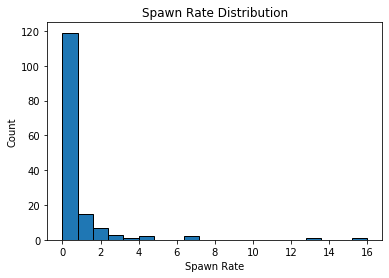

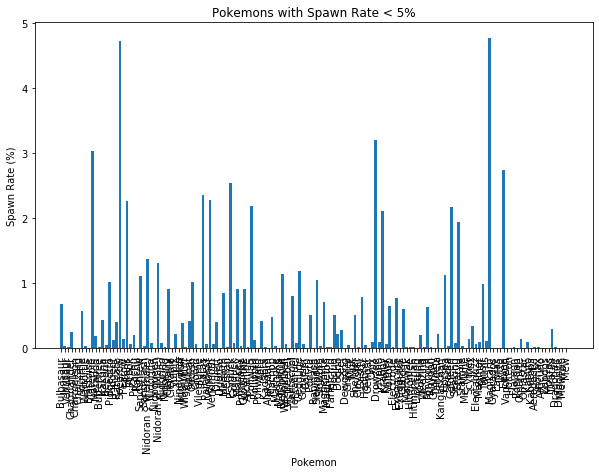

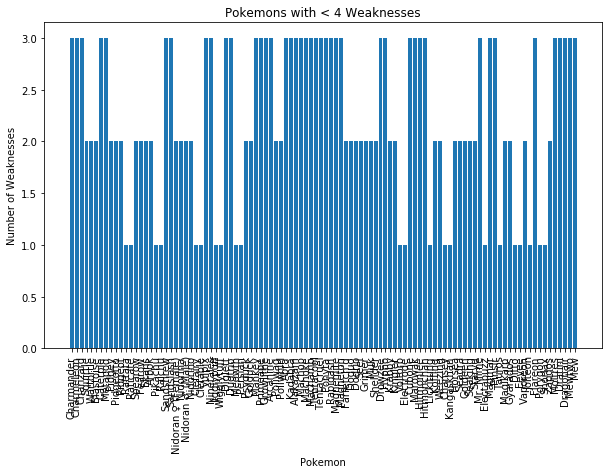

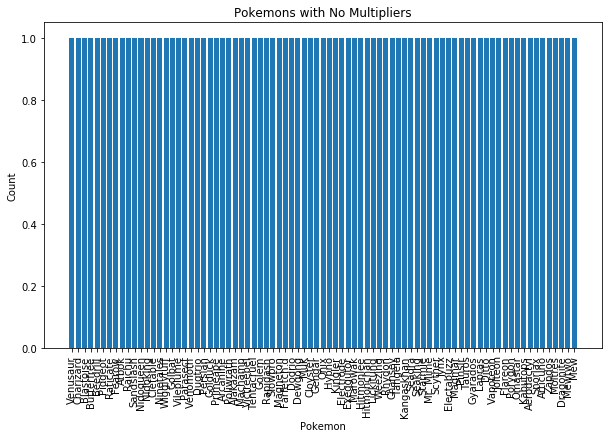

In [18]:
# Print the results
print("Pokemons with spawn rate less than 5%:")
for pokemon in less_than_5_percent_spawn_rate:
    print(pokemon["name"])

print("\nPokemons with less than 4 weaknesses:")
for pokemon in less_than_4_weaknesses:
    print(pokemon["name"])

print("\nPokemons with no multipliers at all:")
for pokemon in no_multipliers:
    print(pokemon["name"])

print("\nPokemons with less than 2 evolutions:")
for pokemon in less_than_2_evolutions:
    print(pokemon["name"])

print("\nPokemons with spawn time less than 300 seconds:")
for pokemon in less_than_300_spawn_time:
    print(pokemon["name"])

print("\nPokemons with more than two types of capabilities:")
for pokemon in more_than_two_types:
    print(pokemon["name"])

# Draw plots
# Plot 1: Spawn Rate Distribution
spawn_rates = [pokemon["spawn_chance"] for pokemon in pokemons]
plt.hist(spawn_rates, bins=20, edgecolor='black')
plt.xlabel("Spawn Rate")
plt.ylabel("Count")
plt.title("Spawn Rate Distribution")
plt.show()

# Plot 2
x1 = [pokemon["name"] for pokemon in less_than_5_percent_spawn_rate]
y1 = [pokemon["spawn_chance"] for pokemon in less_than_5_percent_spawn_rate]

plt.figure(figsize=(10, 6))
plt.bar(x1, y1)
plt.title("Pokemons with Spawn Rate < 5%")
plt.xlabel("Pokemon")
plt.ylabel("Spawn Rate (%)")
plt.xticks(rotation=90)
plt.show()

# plot 3
x2 = [pokemon["name"] for pokemon in less_than_4_weaknesses]
y2 = [len(pokemon["weaknesses"]) for pokemon in less_than_4_weaknesses]

plt.figure(figsize=(10, 6))
plt.bar(x2, y2)
plt.title("Pokemons with < 4 Weaknesses")
plt.xlabel("Pokemon")
plt.ylabel("Number of Weaknesses")
plt.xticks(rotation=90)
plt.show()

# plot 4
x3 = [pokemon["name"] for pokemon in no_multipliers]

plt.figure(figsize=(10, 6))
plt.bar(x3, len(x3) * [1])
plt.title("Pokemons with No Multipliers")
plt.xlabel("Pokemon")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [20]:
import requests
import json
import matplotlib.pyplot as plt

In [44]:
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)
data = json.loads(response.text)

In [45]:
earth_meteorites_before_2000 = []
earth_meteorites_before_1970 = []
mass_more_than_10000kg = []

In [46]:
for meteorite in data:
    if "year" in meteorite:
        year_fell = meteorite["year"].split("-")[0]
    else:
        year_fell = ""  
        
    if "mass (g)" in meteorite:
        mass = float(meteorite["mass (g)"]) / 1000  
    else:
        mass = 0.0  
    
    if year_fell and int(year_fell) < 2000 and meteorite.get("reclat") and meteorite.get("reclong"):
        earth_meteorites_before_2000.append(meteorite)
    
    if year_fell and int(year_fell) < 1970 and meteorite.get("reclat") and meteorite.get("reclong"):
        earth_meteorites_before_1970.append(meteorite)
    
    if mass > 10000:
        mass_more_than_10000kg.append(meteorite)

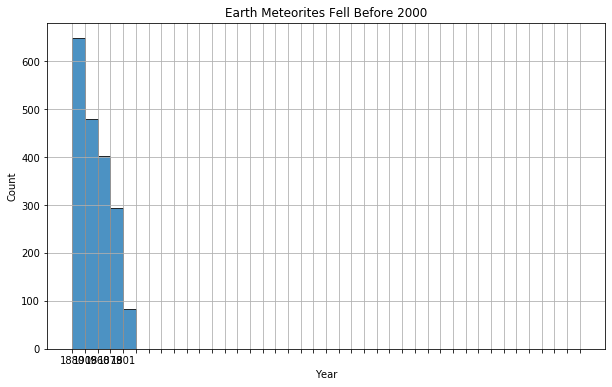

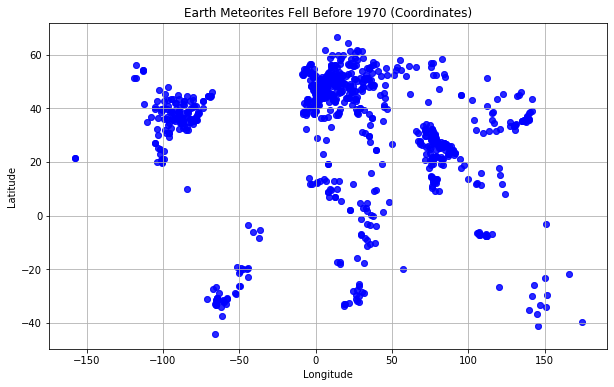

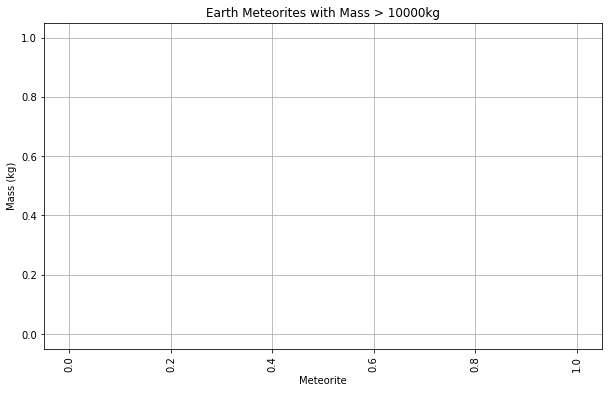

In [29]:
# Plot 1: Earth meteorites that fell before the year 2000
years = [meteorite["year"].split("-")[0] for meteorite in earth_meteorites_before_2000]
count = len(earth_meteorites_before_2000)

plt.figure(figsize=(10, 6))
plt.hist(years, bins=range(0, 2050, 50), edgecolor='black', alpha=0.8)
plt.title("Earth Meteorites Fell Before 2000")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(range(0, 2050, 50))
plt.grid(True)
plt.show()

# Plot 2: Earth meteorites coordinates that fell before the year 1970
latitude = [float(meteorite["reclat"]) for meteorite in earth_meteorites_before_1970]
longitude = [float(meteorite["reclong"]) for meteorite in earth_meteorites_before_1970]

plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, color='blue', alpha=0.6)
plt.title("Earth Meteorites Fell Before 1970 (Coordinates)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# Plot 3: Earth meteorites with mass more than 10000kg
names = [meteorite["name"] for meteorite in mass_more_than_10000kg]
masses = [float(meteorite["mass (g)"]) / 1000 for meteorite in mass_more_than_10000kg]

plt.figure(figsize=(10, 6))
plt.bar(names, masses)
plt.title("Earth Meteorites with Mass > 10000kg")
plt.xlabel("Meteorite")
plt.ylabel("Mass (kg)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [40]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()
#print(data)

episodes = data["_embedded"]["episodes"]
df = pd.DataFrame(episodes)
#print(df)

In [41]:
df["season"] = pd.to_numeric(df["season"], errors="coerce")

df = df[pd.to_numeric(df["rating"], errors="coerce").notnull()]
#print(df)

df["rating"] = pd.to_numeric(df["rating"])

season_ratings = df.groupby("season")["rating"].mean()
#print(season_ratings)

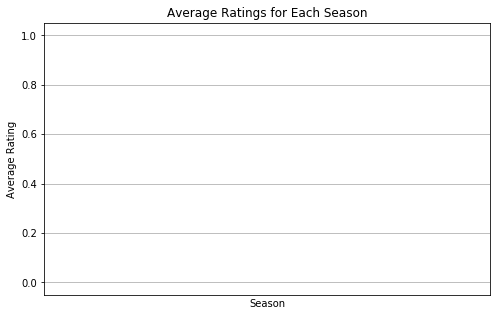

Episodes with Average Rating > 8 for Each Season:
Empty DataFrame
Columns: [season, name]
Index: []

Episodes Aired Before May 2019:
Series([], Name: name, dtype: object)

Episode with Highest Rating for Each Season:
Empty DataFrame
Columns: [season, name, rating]
Index: []

Episode with Lowest Rating for Each Season:
Empty DataFrame
Columns: [season, name, rating]
Index: []

Episode with Highest Rating for Each Season:
Empty DataFrame
Columns: []
Index: []


In [42]:
plt.figure(figsize=(8, 5))
plt.plot(season_ratings.index, season_ratings.values, marker="o")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Each Season")
plt.xticks(season_ratings.index)
plt.grid(True)
plt.show()

high_rated_episodes = df[df.groupby(["season", "name"])["rating"].transform("mean") > 8]
high_rated_episodes = high_rated_episodes[["season", "name"]].drop_duplicates()

# Print episode names with average ratings > 8 for each season
print("Episodes with Average Rating > 8 for Each Season:")
print(high_rated_episodes)

# Get episode names that aired before May 2019
episodes_before_may_2019 = df[df["airdate"] < "2019-05-01"]["name"]

# Print episode names that aired before May 2019
print("\nEpisodes Aired Before May 2019:")
print(episodes_before_may_2019)

# Get episode with highest and lowest rating for each season
highest_rated_episodes = df.groupby("season")["rating"].idxmax()
lowest_rated_episodes = df.groupby("season")["rating"].idxmin()
highest_rated_episodes_info = df.loc[highest_rated_episodes, ["season", "name", "rating"]]
lowest_rated_episodes_info = df.loc[lowest_rated_episodes, ["season", "name", "rating"]]

# Print episode names with the highest and lowest rating for each season
print("\nEpisode with Highest Rating for Each Season:")
print(highest_rated_episodes_info)
print("\nEpisode with Lowest Rating for Each Season:")
print(lowest_rated_episodes_info)

# Get the episode with the highest rating for each season
most_popular_episodes = df.groupby("season").apply(lambda x: x.loc[x["rating"].idxmax(), ["season", "name"]])

# Print the episode with the highest rating for each season
print("\nEpisode with Highest Rating for Each Season:")
print(most_popular_episodes)

Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [43]:
import pandas as pd

data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)
print(df)

        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
1       JHMZC5F37M    Kitsap        Poulsbo    WA      98370.0        2021   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
3       1N4AZ0CP5D      King        Seattle    WA      98119.0        2013   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
...            ...       ...            ...   ...          ...         ...   
130438  7SAYGDEE6P    Pierce     Gig Harbor    WA      98335.0        2023   
130439  1N4BZ1CV7N    Pierce         Tacoma    WA      98408.0        2022   
130440  5YJYGDEE8M      King        Seattle    WA      98109.0        2021   
130441  5YJXCBE22L    Island  Camano Island    WA      98282.0        2020   
130442  5YJ3E1EA5M    Pierce       Puyallup    WA      98375.0        2021   

          Make    Model                   Electric Vehicle Type

In [44]:
non_qualifying_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No']
non_qualifying_cars = non_qualifying_cars[['Make', 'Model']]

print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_qualifying_cars)
print()

tesla_bothell_cars = df[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL')]
tesla_bothell_cars = tesla_bothell_cars[['Model Year', 'Model']]

print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_bothell_cars)

Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []

TESLA cars with the model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []


Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [46]:
import re

def count_pos(phrase):
    
    counts = {'verbs': 0, 'nouns': 0, 'pronouns': 0, 'adjectives': 0}

    phrase = phrase.lower()

    words = re.findall(r'\b\w+\b', phrase)

    for word in words:
        if re.match(r'\b(?:am|is|are|was|were|be|being|been|' \
                    r'have|has|had|do|does|did|shall|will|should|' \
                    r'would|may|might|must|can|could)\b', word):

            counts['verbs'] += 1
        elif re.match(r'\b(?:i|me|my|mine|we|us|our|ours|' \
                      r'you|your|yours|he|him|his|she|her|hers|' \
                      r'it|its|they|them|their|theirs)\b', word):
    
            counts['pronouns'] += 1
        elif re.match(r'\b(?:a|an|the|this|that|these|those|my|' \
                      r'your|his|her|its|our|their|one|two|three|' \
                      r'first|second|third|some|many|much|few|' \
                      r'most|several|all|any|no)\b', word):
            
            counts['adjectives'] += 1
        else:
            counts['nouns'] += 1

    return counts
sample_phrase = "This is an sample statement."
print(count_pos(sample_phrase))

{'verbs': 1, 'nouns': 2, 'pronouns': 0, 'adjectives': 2}
